In [1]:
# Introduction
# The dataset that I used is from Kaggle. It has images of brain tumors that are already split into training and 
# testing folders. I will work on developing a model that can successfully aid a doctor in identifying if an MRI image 
# is showing that a person has or does not have one of the three brain tumors present in the dataset. 
# link https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/data


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB0  # Import EfficientNet model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, GlobalMaxPooling2D
from tensorflow.keras.layers import Dense, Dropout

In [4]:
# Define the path to the main directory containing the subfolders for training and testing
train_main_dir = r'C:\Users\leonc\OneDrive\Documents\Thinkful\Datasets\Neural Networks\Training'
test_main_dir = r'C:\Users\leonc\OneDrive\Documents\Thinkful\Datasets\Neural Networks\Testing'

# List the subdirectories (disease folders) within the main directory for training
training_folders = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Initialize lists to store images and their corresponding labels
images = []
labels = []

# Define the desired size for resizing
desired_size = (128, 128)  # Adjust as needed

# Function to load images from a directory
def load_images_from_directory(directory, images_list, labels_list):
    for folder_name in training_folders:
        folder_path = os.path.join(directory, folder_name)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            image = image.resize(desired_size)
            image_array = np.array(image)
            image_array = image_array.astype('float32') / 255.0
            images_list.append(image_array)
            labels_list.append(folder_name)

# Load images and labels
load_images_from_directory(train_main_dir, images, labels)
load_images_from_directory(test_main_dir, images, labels)

In [5]:
# Convert lists to numpy arrays for both training and testing data
X = np.array(images)
y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the number of classes
nb_classes = 4  # Adjust according to the number of classes in your dataset

# Initialize the label encoder
label_encoder = LabelEncoder()

# Convert string labels to numerical labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode the training and testing labels
Y_train = to_categorical(y_train_encoded, nb_classes)
Y_test = to_categorical(y_test_encoded, nb_classes)




In [6]:
from collections import Counter

# Check the unique classes and their counts
unique_classes = np.unique(y)
class_counts = Counter(y)

print("Unique Classes:", unique_classes)
print("Class Counts:", class_counts)


Unique Classes: ['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']
Class Counts: Counter({'meningioma_tumor': 937, 'glioma_tumor': 926, 'pituitary_tumor': 901, 'no_tumor': 500})


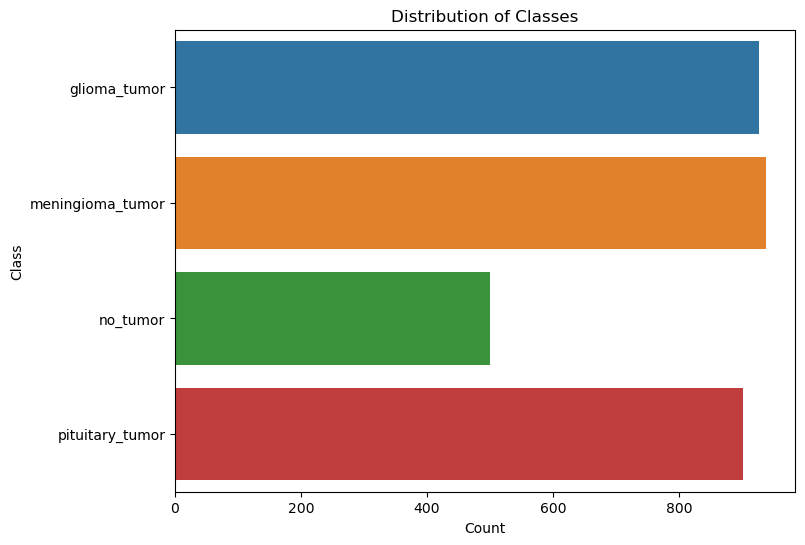

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(y=y)
plt.title('Distribution of Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()


In [8]:
# Calculate summary statistics for image sizes
image_sizes = [(img.shape[0], img.shape[1]) for img in images]

# Convert the list of tuples to a DataFrame for easier analysis
image_sizes_df = pd.DataFrame(image_sizes, columns=['Height', 'Width'])

# Display summary statistics
print("Summary Statistics for Image Sizes:")
print(image_sizes_df.describe())


Summary Statistics for Image Sizes:
       Height   Width
count  3264.0  3264.0
mean    128.0   128.0
std       0.0     0.0
min     128.0   128.0
25%     128.0   128.0
50%     128.0   128.0
75%     128.0   128.0
max     128.0   128.0


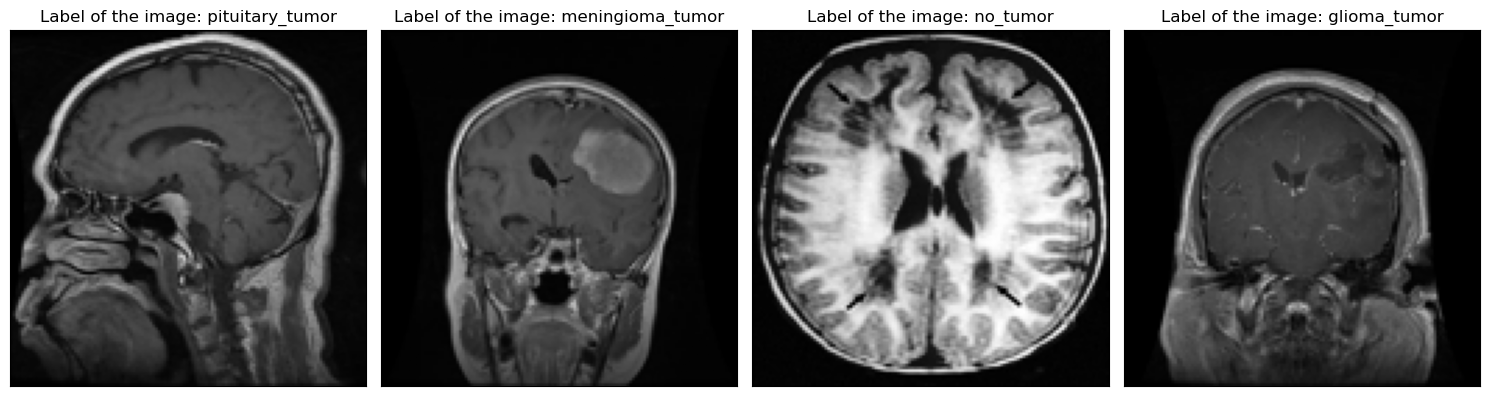

In [9]:
plt.figure(figsize=(15, 8))  # Increase the figure size

plt.subplot(141)
plt.imshow(X_train[444].reshape(128, 128, 3), cmap="gray")
plt.title("Label of the image: {}".format(y_train[444]))
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(142)
plt.imshow(X_train[311].reshape(128, 128, 3), cmap="gray")
plt.title("Label of the image: {}".format(y_train[311]))
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(143)
plt.imshow(X_train[813].reshape(128, 128, 3), cmap="gray")
plt.title("Label of the image: {}".format(y_train[813]))
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.subplot(144)
plt.imshow(X_train[344].reshape(128, 128, 3), cmap="gray")
plt.title("Label of the image: {}".format(y_train[344]))
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [10]:
# Load EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Build your own classification layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Add Global Average Pooling layer
model.add(Dense(256, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))  # Adjust the number of output classes

# Freeze the weights of the pre-trained layers
base_model.trainable = False

from tensorflow.keras.applications import EfficientNetB0

# Define the desired input image size
image_size = 128  # Adjust as needed


# Compile the model and start training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 55s 403ms/step - accuracy: 0.2657 - loss: 1.4034 - val_accuracy: 0.2450 - val_loss: 1.3788
Epoch 2/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 348ms/step - accuracy: 0.2880 - loss: 1.3724 - val_accuracy: 0.2864 - val_loss: 1.3749
Epoch 3/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 356ms/step - accuracy: 0.2707 - loss: 1.3712 - val_accuracy: 0.2450 - val_loss: 1.3605
Epoch 4/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 348ms/step - accuracy: 0.2654 - loss: 1.3627 - val_accuracy: 0.2864 - val_loss: 1.3553
Epoch 5/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 359ms/step - accuracy: 0.2875 - loss: 1.3622 - val_accuracy: 0.2450 - val_loss: 1.3511
Epoch 6/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 353ms/step - accuracy: 0.2812 - loss: 1.3616 - val_accuracy: 0.2864 - val_loss: 1.3554
Epoch 7/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 353ms/step - accuracy: 0.2897 - loss: 1.3621 - val_accuracy: 0.2864 - val_loss: 1.3530
Epoch 8/10
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 354ms/step - accuracy: 0.2956 - loss: 1.3629 - val_accu

In [11]:
# Adding layers

from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())  # Add Global Average Pooling layer
model.add(Dense(512, activation='relu'))  # Increase the number of units to 512
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(256, activation='relu'))  # Another dense layer with 256 units
model.add(Dense(128, activation='relu'))  # Another dense layer with 128 units
model.add(Dense(64, activation='relu'))  # Another dense layer with 64 units
model.add(Dense(nb_classes, activation='softmax'))  # Adjust the number of output classes

# Freeze the weights of the pre-trained layers
base_model.trainable = False

# Compile the model and start training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 434ms/step - accuracy: 0.2739 - loss: 1.3905 - val_accuracy: 0.2450 - val_loss: 1.3583
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 372ms/step - accuracy: 0.2669 - loss: 1.3732 - val_accuracy: 0.2450 - val_loss: 1.3573
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 371ms/step - accuracy: 0.2685 - loss: 1.3741 - val_accuracy: 0.2864 - val_loss: 1.3476
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 380ms/step - accuracy: 0.2770 - loss: 1.3651 - val_accuracy: 0.2450 - val_loss: 1.3543
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 360ms/step - accuracy: 0.2667 - loss: 1.3657 - val_accuracy: 0.2450 - val_loss: 1.3591
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 363ms/step - accuracy: 0.2842 - loss: 1.3649 - val_accuracy: 0.2864 - val_loss: 1.3513
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 367ms/step - accuracy: 0.2725 - loss: 1.3663 - val_accuracy: 0.2864 - val_loss: 1.3524
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 365ms/step - accuracy: 0.2915 - loss: 1.3604 - val_accu

In [12]:
# Using GlobalMaxPooling2D

model = Sequential()
model.add(base_model)
model.add(GlobalMaxPooling2D()) # Add Global max Pooling layer
model.add(Dense(512, activation='relu'))  # Increase the number of units to 512
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(256, activation='relu'))  # Another dense layer with 256 units
model.add(Dense(128, activation='relu'))  # Another dense layer with 128 units
model.add(Dense(64, activation='relu'))  # Another dense layer with 64 units
model.add(Dense(nb_classes, activation='softmax'))  # Adjust the number of output classes

# Freeze the weights of the pre-trained layers
base_model.trainable = False

# Compile the model and start training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 436ms/step - accuracy: 0.2523 - loss: 1.7495 - val_accuracy: 0.2864 - val_loss: 1.3638
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 367ms/step - accuracy: 0.2787 - loss: 1.3985 - val_accuracy: 0.2450 - val_loss: 1.3770
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 370ms/step - accuracy: 0.2861 - loss: 1.3680 - val_accuracy: 0.2450 - val_loss: 1.3578
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.3056 - loss: 1.3675 - val_accuracy: 0.2864 - val_loss: 1.3601
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 367ms/step - accuracy: 0.2876 - loss: 1.3632 - val_accuracy: 0.2864 - val_loss: 1.3540
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.2923 - loss: 1.3605 - val_accuracy: 0.2864 - val_loss: 1.3519
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 371ms/step - accuracy: 0.2752 - loss: 1.3651 - val_accuracy: 0.2864 - val_loss: 1.3517
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 368ms/step - accuracy: 0.3003 - loss: 1.3537 - val_accu

In [13]:
# Adding more dropout layers


model = Sequential()
model.add(base_model)
model.add(GlobalMaxPooling2D()) # Add Global max Pooling layer
model.add(Dense(512, activation='relu'))  # Increase the number of units to 512
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(256, activation='relu'))  # Another dense layer with 256 units
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(128, activation='relu'))  # Another dense layer with 128 units
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(64, activation='relu'))  # Another dense layer with 64 units
model.add(Dense(nb_classes, activation='softmax'))  # Adjust the number of output classes

# Freeze the weights of the pre-trained layers
base_model.trainable = False

# Compile the model and start training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 58s 439ms/step - accuracy: 0.2529 - loss: 2.9488 - val_accuracy: 0.2864 - val_loss: 1.3637
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.2894 - loss: 1.3821 - val_accuracy: 0.2450 - val_loss: 1.3712
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 364ms/step - accuracy: 0.2857 - loss: 1.3730 - val_accuracy: 0.2450 - val_loss: 1.3631
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 371ms/step - accuracy: 0.2849 - loss: 1.3659 - val_accuracy: 0.2450 - val_loss: 1.3579
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 370ms/step - accuracy: 0.2904 - loss: 1.3663 - val_accuracy: 0.2450 - val_loss: 1.3537
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - accuracy: 0.2853 - loss: 1.3608 - val_accuracy: 0.2450 - val_loss: 1.3525
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 361ms/step - accuracy: 0.2827 - loss: 1.3627 - val_accuracy: 0.2864 - val_loss: 1.3515
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 373ms/step - accuracy: 0.2790 - loss: 1.3706 - val_accu

In [14]:
# Using more nodes


model = Sequential()
model.add(base_model)
model.add(GlobalMaxPooling2D()) # Add Global max Pooling layer
model.add(Dense(1024, activation='relu'))  # Increase the number of units to 1024
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(512, activation='relu'))  # Another dense layer with 512 units
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(256, activation='relu'))  # Another dense layer with 256 units
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(128, activation='relu'))  # Another dense layer with 128 units
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(nb_classes, activation='softmax'))  # Adjust the number of output classes

# Freeze the weights of the pre-trained layers
base_model.trainable = False

# Compile the model and start training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 60s 435ms/step - accuracy: 0.2649 - loss: 3.9111 - val_accuracy: 0.2864 - val_loss: 1.3746
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 383ms/step - accuracy: 0.2700 - loss: 1.4123 - val_accuracy: 0.2864 - val_loss: 1.3732
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 380ms/step - accuracy: 0.2683 - loss: 1.3752 - val_accuracy: 0.2864 - val_loss: 1.3577
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 377ms/step - accuracy: 0.2940 - loss: 1.3689 - val_accuracy: 0.2864 - val_loss: 1.3483
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 375ms/step - accuracy: 0.2738 - loss: 1.3665 - val_accuracy: 0.2864 - val_loss: 1.3533
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 378ms/step - accuracy: 0.2756 - loss: 1.3611 - val_accuracy: 0.2864 - val_loss: 1.3509
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 31s 381ms/step - accuracy: 0.2818 - loss: 1.3675 - val_accuracy: 0.2864 - val_loss: 1.3517
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 18788s 232s/step - accuracy: 0.2733 - loss: 1.3676 - val_ac

21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 518ms/step


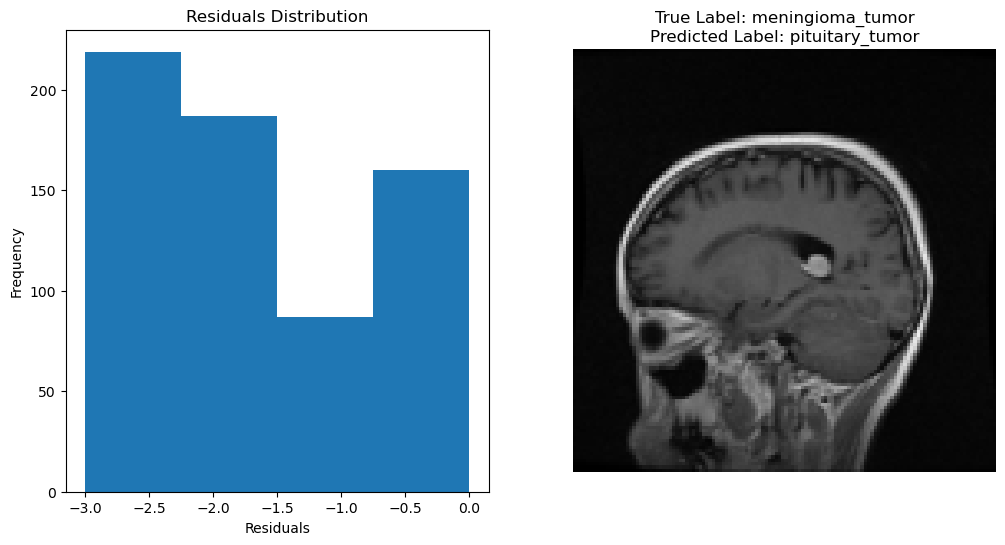

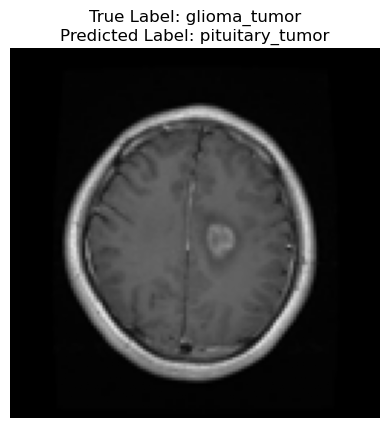

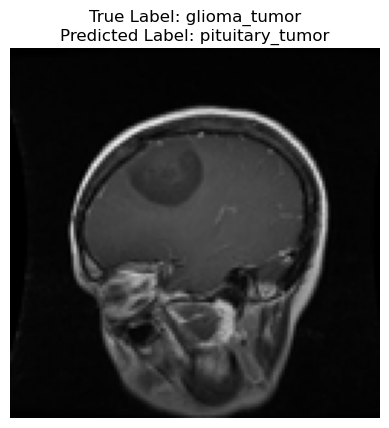

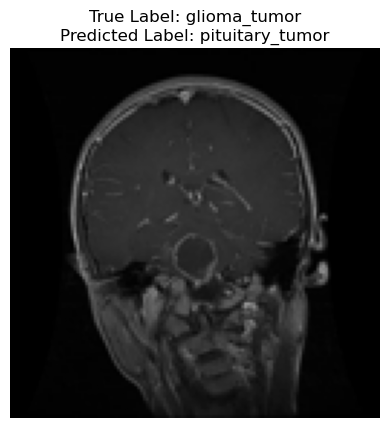

In [15]:
# Step 1: Obtain predictions from the model
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(Y_test, axis=1)

# Step 2: Compute residuals
residuals = true_labels - predicted_labels

# Step 3: Identify failures
failures = np.where(residuals != 0)[0]

# Step 4: Visualization
plt.figure(figsize=(12, 6))

# Plot residuals
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=nb_classes)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Plot failures
plt.subplot(1, 2, 2)
for idx in failures[:4]:  # Plot the first 4 failures
    plt.imshow(X_test[idx])
    plt.title(f'True Label: {label_encoder.inverse_transform([true_labels[idx]])[0]}\n'
              f'Predicted Label: {label_encoder.inverse_transform([predicted_labels[idx]])[0]}')
    plt.axis('off')
    plt.show()

In [16]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.351423978805542
Test accuracy: 0.2450229674577713


In [17]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 4, 4, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 1280)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1024)           │     1,311,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,053,425 (38.35 MB)

 Trainable params: 2,001,284 (7.63 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

 Optimizer params: 4,002,570 (15.27 MB)

In [18]:
# Use VGG16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten

# Load VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Build your own classification layers
model = Sequential()
model.add(base_model)
model.add(Flatten()) # Flatten layer to convert 3D feature maps to 1D
model.add(Dense(1024, activation='relu'))  # Increase the number of units to 1024
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(512, activation='relu'))  # Another dense layer with 512 units
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(256, activation='relu'))  # Another dense layer with 256 units
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(128, activation='relu'))  # Another dense layer with 128 units
model.add(Dropout(0.5))  # Adding dropout layer for regularization
model.add(Dense(nb_classes, activation='softmax'))  # Adjust the number of output classes

# Freeze the weights of the pre-trained layers
base_model.trainable = False

# Compile the model and start training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.2523 - loss: 2.3352 - val_accuracy: 0.4946 - val_loss: 1.3305
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.3515 - loss: 1.3185 - val_accuracy: 0.5681 - val_loss: 1.0552
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.5010 - loss: 1.0817 - val_accuracy: 0.6217 - val_loss: 0.8603
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 762s 9s/step - accuracy: 0.5902 - loss: 0.9043 - val_accuracy: 0.6753 - val_loss: 0.7064
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.6434 - loss: 0.8374 - val_accuracy: 0.6998 - val_loss: 0.6433
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.6862 - loss: 0.7528 - val_accuracy: 0.8116 - val_loss: 0.6083
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.7048 - loss: 0.7221 - val_accuracy: 0.7994 - val_loss: 0.5285
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7324 - loss: 0.6471 - val_accuracy: 0.8162 - v

21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step


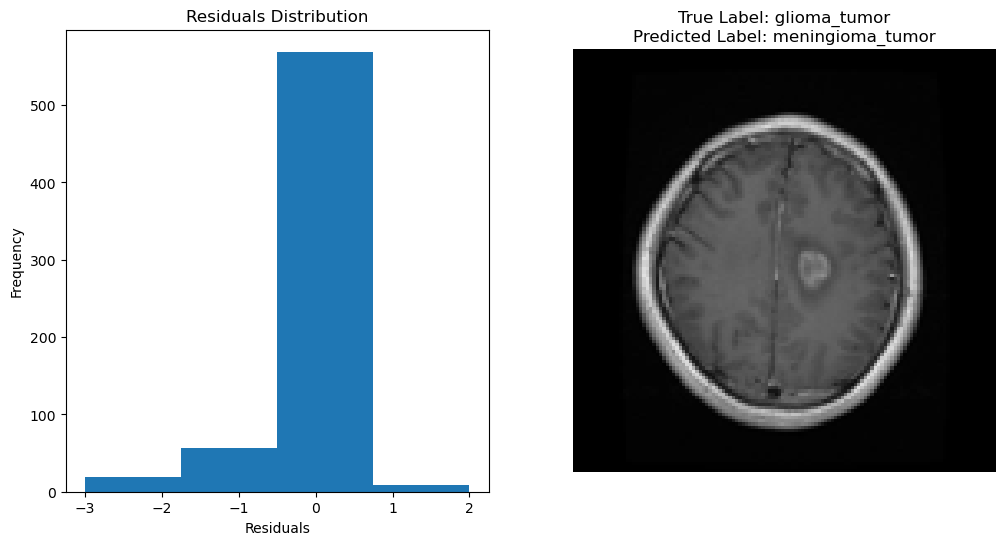

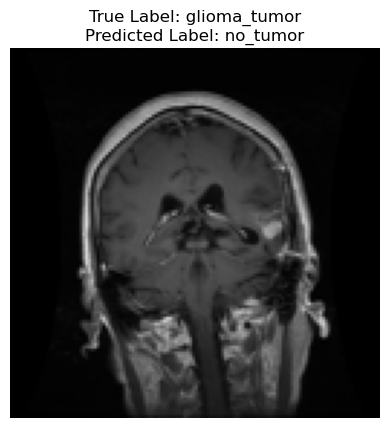

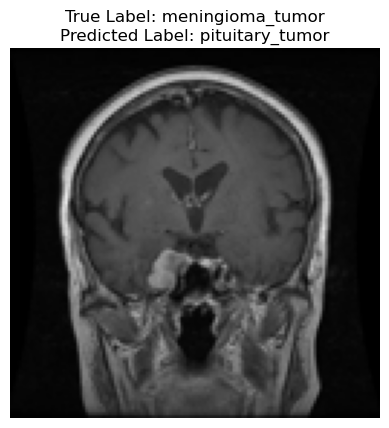

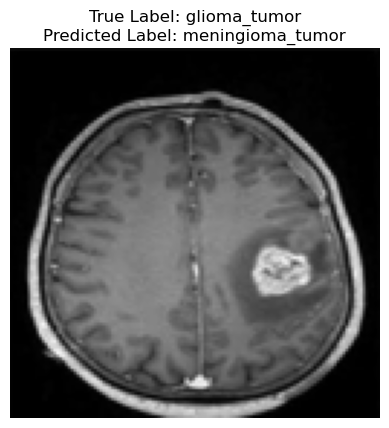

In [19]:
# Step 1: Obtain predictions from the model
y_pred = model.predict(X_test)
predicted_labels = np.argmax(y_pred, axis=1)
true_labels = np.argmax(Y_test, axis=1)

# Step 2: Compute residuals
residuals = true_labels - predicted_labels

# Step 3: Identify failures
failures = np.where(residuals != 0)[0]

# Step 4: Visualization
plt.figure(figsize=(12, 6))

# Plot residuals
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=nb_classes)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Plot failures
plt.subplot(1, 2, 2)
for idx in failures[:4]:  # Plot the first 4 failures
    plt.imshow(X_test[idx])
    plt.title(f'True Label: {label_encoder.inverse_transform([true_labels[idx]])[0]}\n'
              f'Predicted Label: {label_encoder.inverse_transform([predicted_labels[idx]])[0]}')
    plt.axis('off')
    plt.show()

In [20]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.36214932799339294
Test accuracy: 0.8713629245758057


In [21]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,952,206 (160.03 MB)

 Trainable params: 9,079,172 (34.63 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 18,158,346 (69.27 MB)

In [22]:
# Conclusion

# The VGG16 model is able to obtain the best results; The Accuracy significantly improved compared to the other models. 
# The end user of this model would be the doctors who screen patients for tumors. 
# The deployment of such tools can drastically affect the lives of patients. Detecting tumors at an early stage is
# crucial to have better outcomes. This type of model would be used to assist doctors to take a closer look at an image
# that has been flagged as a potential patient with a tumor. 
